In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [61]:
def get_weighted_array(alpha, Nspacing, numdraws=1e5):
    # Overlap a circular beam onto a pixelized grid 
    Nbeam = Nspacing**2
    rmax = alpha*.5
    ndraws = int(numdraws)
    spacing = np.linspace(0,1,Nspacing+1)
    centered_spacing = spacing - .5
#     empty_weight_beam = np.zeros((Nspacing, Nspacing), dtype=np.complex128)   # Generally this should be complex but in this notebook it doesn't matter
    empty_weight_beam = np.zeros((Nspacing, Nspacing))
    
    for i in range(Nbeam):
        xi, yi = np.unravel_index(i, (Nspacing, Nspacing))
        draws = np.array([np.random.uniform(centered_spacing[xi], centered_spacing[xi+1], ndraws), np.random.uniform(centered_spacing[yi], centered_spacing[yi+1], ndraws)])
        dist = np.linalg.norm(draws, axis=0)
        empty_weight_beam[xi, yi] = np.sum(dist < rmax)/ndraws #* np.exp(1j*rand_phases(1))
    sym_beam = .5*(empty_weight_beam + empty_weight_beam.T)
    return sym_beam

In [62]:
N_beam = 13
N_convolved = 2*N_beam - 1
conv_beam = True

In [63]:
if conv_beam:
    N_eff = N_convolved
else:
    N_eff = N_beam

In [64]:
beam_array = get_weighted_array(.8, N_eff)
tick_marks = np.arange(1, N_eff+1)

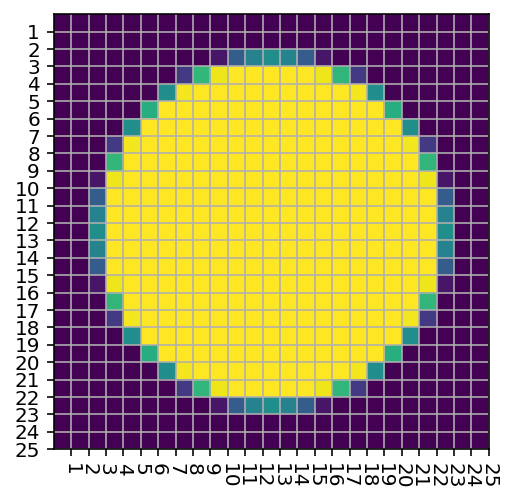

In [65]:
plt.imshow(beam_array, extent=(0, N_eff, N_eff, 0));
plt.xticks(tick_marks, rotation=270)
plt.yticks(tick_marks)
plt.grid(True, which='major')